# Logistic Regression Model - Binary
In this notebook, we will convert our data into binary classes. We will then create two logistic regression models, one with a downsampled majority class and one with an upsampled minority class, then compare the performance between the two.

### Instructions to run:
- ensure the required files are present in the correct places
  - train.csv
  - utils.py
- ensure all python packages are installed correctly
- if there are issues with loading the csv file, try changing the path to just "train.csv". sometimes it works differently on different machines!
- click run all or run each cell individually

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils as utils

In [2]:
train_path = '../data/train.csv'

In [37]:
df = pd.read_csv(train_path)
# replace suicide with 1, everything else 0
df['label'] = (df['label'] == 'self.SuicideWatch').astype(int)
df.describe()

,label
count,45706.000000
mean,0.187459
std,0.390284
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [38]:
# get majority and minority classes
df_majority = df[df['label'] == 0]
df_minority = df[df['label'] == 1]

In [19]:
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# downsample majority class
df_majority_downsampled = resample(df_majority,
                                    replace=False,
                                    n_samples=len(df_minority),
                                    random_state=42)

In [20]:
# create new dfs with upsampled/downsampled data
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = df_downsampled.sample(frac=1, random_state=42)

In [21]:
# ensure counts are correct
print(df_upsampled['label'].value_counts())
print(df_downsampled['label'].value_counts())

label
1    37138
0    37138
Name: count, dtype: int64
label
0    8568
1    8568
Name: count, dtype: int64


In [22]:
# create tfidf vectorizer for upsampled and downsampled data
tfidf_upsampled = TfidfVectorizer(max_features=10000)
X_upsampled = tfidf_upsampled.fit_transform(df_upsampled['text'])

tfidf_downsampled = TfidfVectorizer(max_features=10000)
X_downsampled = tfidf_downsampled.fit_transform(df_downsampled['text'])

In [23]:
# split datasets into train and test sets
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, df_upsampled['label'], test_size=0.2, random_state=42)

X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(X_downsampled, df_downsampled['label'], test_size=0.2, random_state=42)

In [24]:
# create models, fit, and predict for both upsampled and downsampled data
model_upsampled = LogisticRegression()
model_upsampled.fit(X_train_upsampled, y_train_upsampled)
y_pred_upsampled = model_upsampled.predict(X_test_upsampled)

model_downsampled = LogisticRegression()
model_downsampled.fit(X_train_downsampled, y_train_downsampled)
y_pred_downsampled = model_downsampled.predict(X_test_downsampled)

In [25]:
# function to get precision, recall, f1, and accuracy metrics
def get_prfa(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return precision, recall, f1, accuracy

In [27]:
# get performance metrics for both models
precision_upsampled, recall_upsampled, f1_upsampled, accuracy_upsampled = get_prfa(y_test_upsampled, y_pred_upsampled)
precision_downsampled, recall_downsampled, f1_downsampled, accuracy_downsampled = get_prfa(y_test_downsampled, y_pred_downsampled)

In [28]:
# print upsampling metrics
print('Upsampled metrics:')
print('Precision:', precision_upsampled)
print('Recall:', recall_upsampled)
print('F1:', f1_upsampled)
print('Accuracy:', accuracy_upsampled)

Upsampled metrics:
Precision: 0.8446550816219063
Recall: 0.8636424821644905
F1: 0.8540432612312812
Accuracy: 0.8523828756058158


In [29]:
# print downsampling metrics
print('Downsampled metrics:')
print('Precision:', precision_downsampled)
print('Recall:', recall_downsampled)
print('F1:', f1_downsampled)
print('Accuracy:', accuracy_downsampled)

Downsampled metrics:
Precision: 0.8019976498237368
Recall: 0.8024691358024691
F1: 0.8022333235380547
Accuracy: 0.8036756126021003


In [30]:
# plot metrics
metrics = ['Precision', 'Recall', 'F1', 'Accuracy']
upsampled = [precision_upsampled, recall_upsampled, f1_upsampled, accuracy_upsampled]
downsampled = [precision_downsampled, recall_downsampled, f1_downsampled, accuracy_downsampled]
normal = [0.6797418587296911, 0.6663749726536863, 0.6676687415263957, 0.6663749726536863]

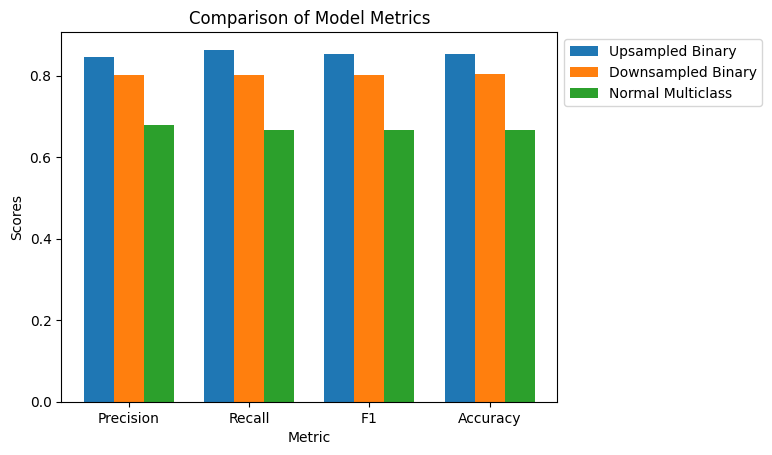

In [36]:
index = np.arange(4)
bar_width = 0.25
fig, ax = plt.subplots()

bars1 = ax.bar(index, upsampled, bar_width, label='Upsampled Binary')
bars2 = ax.bar(index + bar_width, downsampled, bar_width, label='Downsampled Binary')
bars3 = ax.bar(index + 2 * bar_width, normal, bar_width, label='Normal Multiclass')

ax.set_xlabel('Metric')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('LRcomparison.png', bbox_inches='tight')
plt.show()